In [ ]:
!pip install tensorflow

In [ ]:
import cv2
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
batch_size = 100
img_height = 250
img_width = 250

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/data/train',
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/data/test',
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size)

validation_ds =  tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/data/val',
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size)

Found 786 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Found 98 files belonging to 2 classes.


In [ ]:
class_names = training_ds.class_names

## Configuring dataset for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_ds = training_ds.cache().prefetch(buffer_size=AUTOTUNE)
testing_ds = testing_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
img_shape = (img_height, img_width, 3)

base_model = tf.keras.applications.MobileNetV2(input_shape=img_shape,
                                               include_top=False,
                                               weights='imagenet')

base_model.trainable = False

In [ ]:
model = tf.keras.Sequential([
    base_model,
    layers.Conv2D(32, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.Conv2D(128, 3, activation='relu'),
    layers.Flatten(),
    layers.Dense(len(class_names), activation= 'softmax')
])

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(training_ds, validation_data = validation_ds, epochs = 50)

Epoch 1/50
8/8 [==============================] - 113s 7s/step - loss: 0.8110 - accuracy: 0.5712 - val_loss: 0.6380 - val_accuracy: 0.6122
Epoch 2/50
8/8 [==============================] - 57s 7s/step - loss: 0.5410 - accuracy: 0.7277 - val_loss: 0.5317 - val_accuracy: 0.7755
Epoch 3/50
8/8 [==============================] - 59s 8s/step - loss: 0.3803 - accuracy: 0.8359 - val_loss: 0.4085 - val_accuracy: 0.7653
Epoch 4/50
8/8 [==============================] - 69s 9s/step - loss: 0.2389 - accuracy: 0.9020 - val_loss: 0.4105 - val_accuracy: 0.7959
Epoch 5/50
8/8 [==============================] - 62s 8s/step - loss: 0.1737 - accuracy: 0.9415 - val_loss: 0.2569 - val_accuracy: 0.9082
Epoch 6/50
8/8 [==============================] - 56s 7s/step - loss: 0.0995 - accuracy: 0.9593 - val_loss: 0.2090 - val_accuracy: 0.9082
Epoch 7/50
8/8 [==============================] - 58s 7s/step - loss: 0.0629 - accuracy: 0.9809 - val_loss: 0.1866 - val_accuracy: 0.9286
Epoch 8/50
8/8 [=================

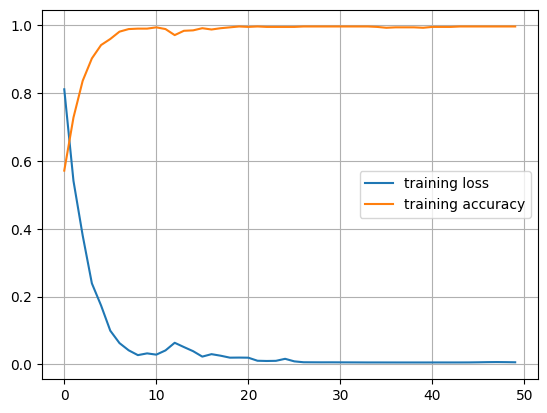

In [ ]:
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.grid(True)
plt.legend()

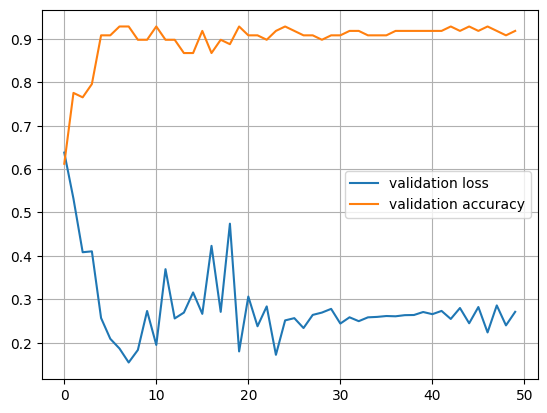

In [ ]:
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.grid(True)
plt.legend()

In [ ]:
import cv2
import tensorflow as tf
image=[]
label=[]

c=1
cap= cv2.VideoCapture('/content/drive/MyDrive/data/accident2.mp4')
while True:
    grabbed, frame = cap.read()
    if c%20==0:
        print(c)
        resized_frame=tf.keras.preprocessing.image.smart_resize(frame, (img_height, img_width), interpolation='bilinear')
        image.append(resized_frame)
        label.append(predict_frame(resized_frame))
        if(len(image)==14):
            break
    c+=1

cap.release()

20
1/1 [==============================] - 0s 66ms/step
40
1/1 [==============================] - 0s 62ms/step
60
1/1 [==============================] - 0s 65ms/step
80
1/1 [==============================] - 0s 56ms/step
100
1/1 [==============================] - 0s 61ms/step
120
1/1 [==============================] - 0s 61ms/step
140
1/1 [==============================] - 0s 58ms/step
160
1/1 [==============================] - 0s 58ms/step
180
1/1 [==============================] - 0s 58ms/step
200
1/1 [==============================] - 0s 58ms/step
220
1/1 [==============================] - 0s 56ms/step
240
1/1 [==============================] - 0s 56ms/step
260
1/1 [==============================] - 0s 59ms/step
280
1/1 [==============================] - 0s 58ms/step


4/4 [==============================] - 5s 1s/step


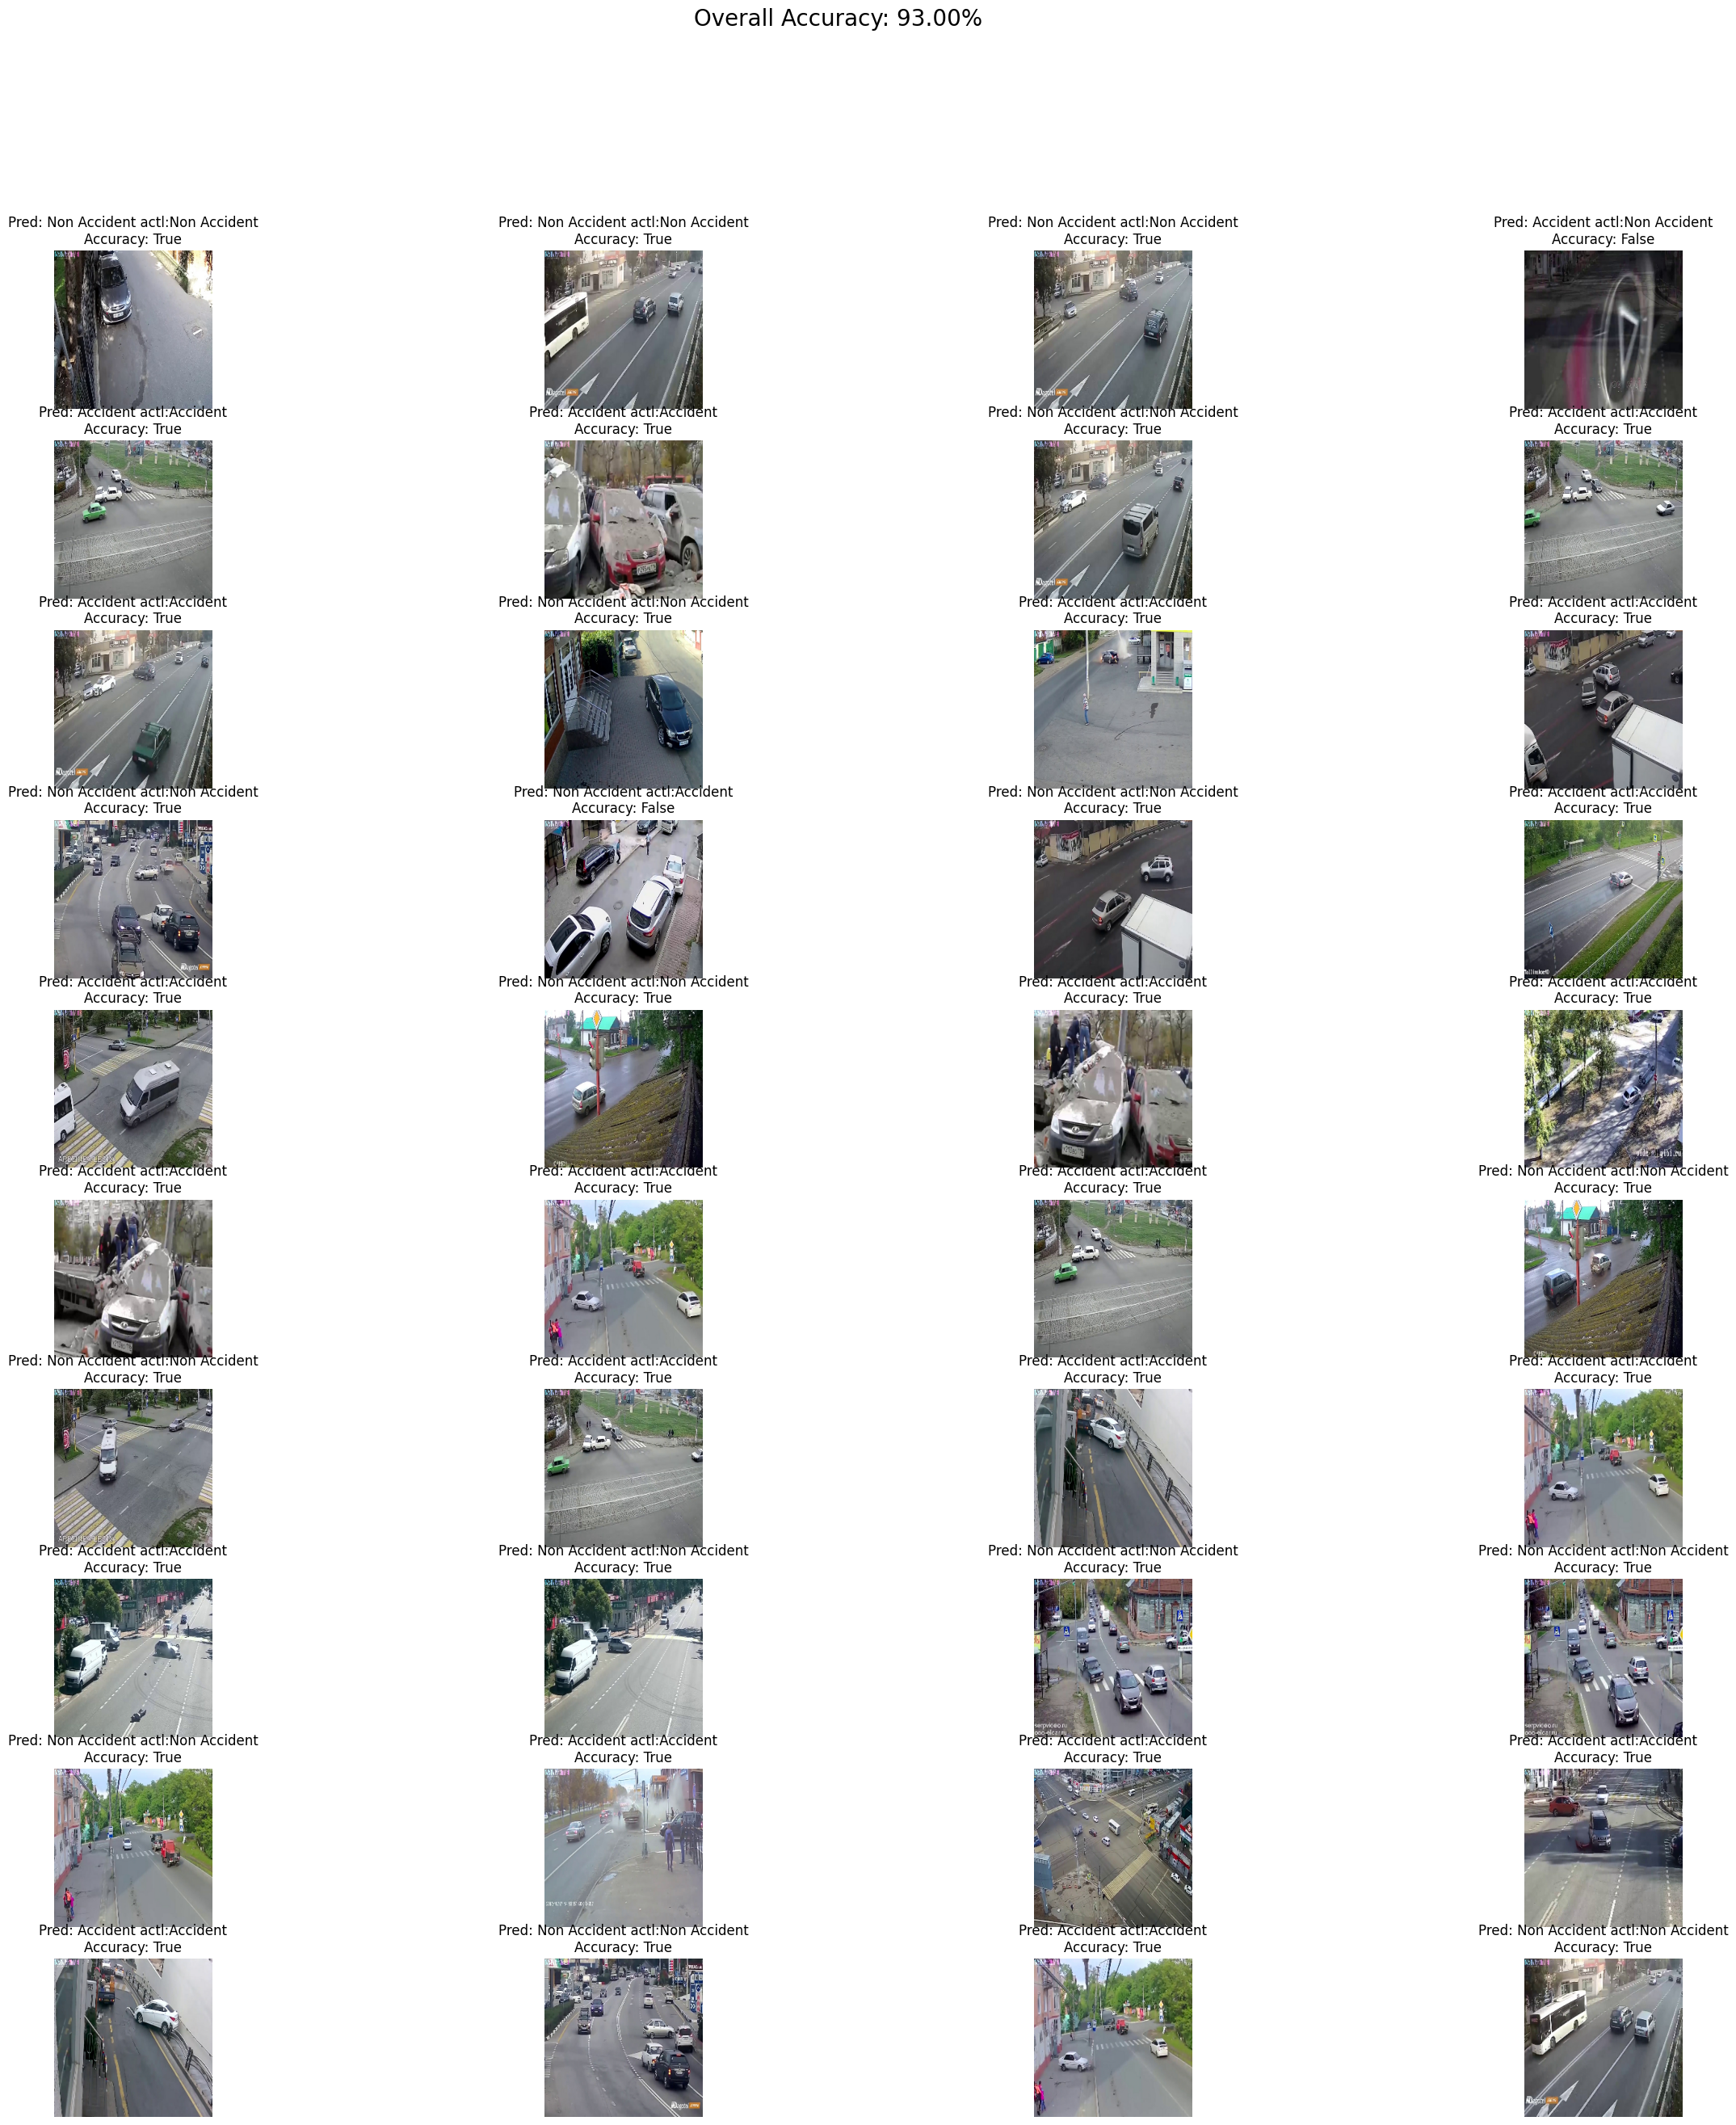

In [ ]:
AccuracyVector = []

plt.figure(figsize=(30, 30))
for images, labels in testing_ds.take(1):
    predictions = model.predict(images)
    predlabel = []
    prdlbl = []

    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))

    AccuracyVector = np.array(prdlbl) == labels

    # Calculate accuracy
    accuracy = np.mean(AccuracyVector)

    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        # Display predicted and actual labels along with accuracy
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] + f'\nAccuracy: {AccuracyVector[i]}')

        plt.axis('off')
        plt.grid(True)

# Display overall accuracy
plt.suptitle(f'Overall Accuracy: {accuracy:.2%}', fontsize=20)
plt.show()

In [ ]:
def predict_frame(img):
    img_array = tf.keras.utils.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    prediction=(model.predict(img_batch) > 0.5).astype("int32")
    if(prediction[0][0]==0):
        return("Accident Detected")
    else:
        return("No Accident")

No Accident
AxesImage(size=(250, 250))
No Accident
AxesImage(size=(250, 250))
Accident Detected
AxesImage(size=(250, 250))
No Accident
AxesImage(size=(250, 250))
No Accident
AxesImage(size=(250, 250))
No Accident
AxesImage(size=(250, 250))
No Accident
AxesImage(size=(250, 250))
No Accident
AxesImage(size=(250, 250))
No Accident
AxesImage(size=(250, 250))
No Accident
AxesImage(size=(250, 250))
No Accident
AxesImage(size=(250, 250))
No Accident
AxesImage(size=(250, 250))
No Accident
AxesImage(size=(250, 250))
No Accident
AxesImage(size=(250, 250))


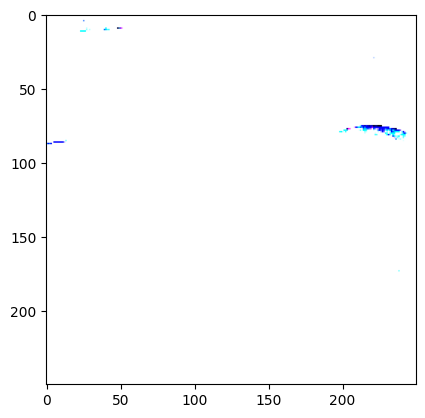

In [ ]:
for i in range(len(image)):
  print(label[i])
  print(plt.imshow(image[i]))